In [1]:
import tensorflow as tf
from tensorflow import keras

2023-11-23 10:47:09.009037: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-23 10:47:09.009081: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-23 10:47:09.010937: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-23 10:47:09.218443: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
model = keras.models.load_model('dino_dragon_10_0.899.h5')

2023-11-23 10:48:05.205188: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-23 10:48:05.244777: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-23 10:48:05.244819: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-23 10:48:05.246917: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-23 10:48:05.246972: I tensorflow/compile

In [4]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('dino-vs-dragon.tflite', 'wb') as f_out:
    f_out.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpbclagc96/assets


INFO:tensorflow:Assets written to: /tmp/tmpbclagc96/assets
2023-11-23 10:48:08.364746: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2023-11-23 10:48:08.364790: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.
2023-11-23 10:48:08.365541: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmpbclagc96
2023-11-23 10:48:08.366407: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2023-11-23 10:48:08.366418: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: /tmp/tmpbclagc96
2023-11-23 10:48:08.368229: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:382] MLIR V1 optimization pass is not enabled
2023-11-23 10:48:08.368830: I tensorflow/cc/saved_model/loader.cc:233] Restoring SavedModel bundle.
2023-11-23 10:48:08.436773: I tensorflow/cc/saved_model/loader.cc:217] Running initializatio

In [5]:
!ls -lh dino-vs-dragon.tflite

-rwxrwxrwx 1 ellanix ellanix 43M Nov 23 10:48 dino-vs-dragon.tflite


In [6]:
import tensorflow.lite as tflite

In [7]:
interpreter = tflite.Interpreter(model_path='dino-vs-dragon.tflite')
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]['index']
output_index = interpreter.get_output_details()[0]['index']

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [8]:
output_index

13

In [9]:
from io import BytesIO
from urllib import request

from PIL import Image

def download_image(url):
    with request.urlopen(url) as resp:
        buffer = resp.read()
    stream = BytesIO(buffer)
    img = Image.open(stream)
    return img


def prepare_image(img, target_size):
    if img.mode != 'RGB':
        img = img.convert('RGB')
    img = img.resize(target_size, Image.NEAREST)
    return img

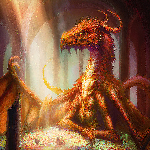

In [10]:
img = download_image('https://upload.wikimedia.org/wikipedia/commons/thumb/d/df/Smaug_par_David_Demaret.jpg/1280px-Smaug_par_David_Demaret.jpg')
img = prepare_image(img, target_size=(150, 150))
img

In [11]:
import numpy as np

In [12]:
def prepare_input(x):
    return x / 255.0

In [13]:
x = np.array(img, dtype='float32')
X = np.array([x])
X = prepare_input(X)

In [14]:
X[0, 0, 0, 0]

0.5529412

In [15]:
interpreter.set_tensor(input_index, X)
interpreter.invoke()

preds = interpreter.get_tensor(output_index)

In [16]:
preds

array([[0.82448506]], dtype=float32)